# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)
    * **TotalWorkingYears**	:	총 근무 연수



In [4]:
# Attrition
target = 'Attrition'
data[target].value_counts()
# 0 - 이직안한 사람
# 1 - 이직한 사람

Attrition
0    405
1    195
Name: count, dtype: int64

In [5]:
# Attrition
target = 'Attrition'
data[target].value_counts(normalize = True)
# 0 - 이직안한 사람 전체  총 평균은 0.625이다.
# 1 - 이직한 사람의 전체 평균 0.325다.

Attrition
0    0.675
1    0.325
Name: proportion, dtype: float64

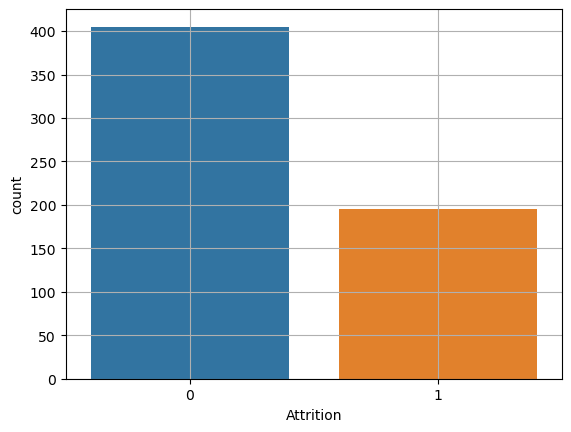

In [7]:
sns.countplot(x = target, data = data)
plt.grid()

In [12]:
# Overtime

# Attrition
var = 'Attrition'
data[var].value_counts()

Attrition
0    405
1    195
Name: count, dtype: int64

In [13]:
var = 'Attrition'
data[var].value_counts(normalize = True)

Attrition
0    0.675
1    0.325
Name: proportion, dtype: float64

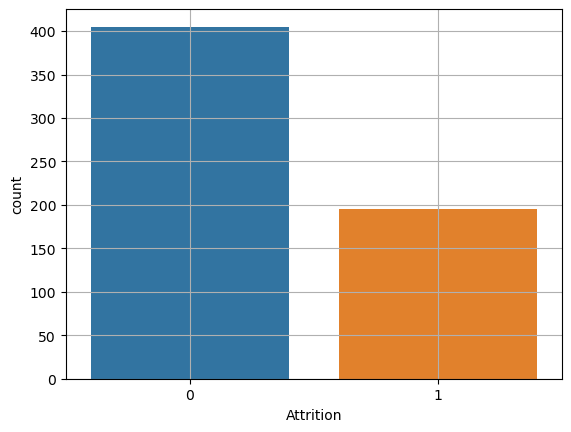

In [15]:
sns.countplot(x = var, data = data)
plt.grid()
plt.show()

In [25]:
var = 'PercentSalaryHike'
data[[var]].describe().T

,count,mean,std,min,25%,50%,75%,max
PercentSalaryHike,600.0,15.288333,3.667098,11.0,12.0,14.0,18.0,25.0


<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

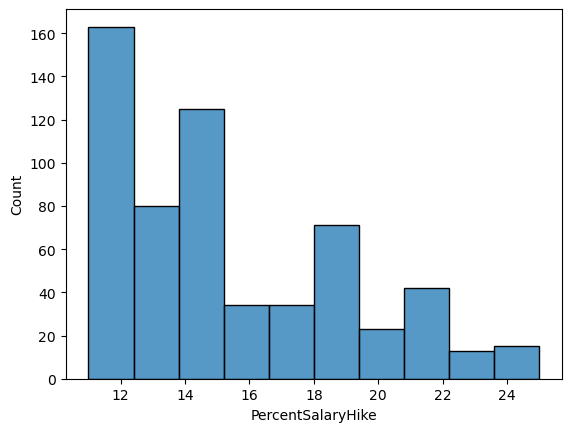

In [26]:
sns.histplot(x = var, data = data, bins = 10)

## **2.범주-->범주**

In [27]:
target = 'Attrition'

### **(1) Gender --> Attrition**

In [28]:
feature = 'Gender'

* 교차표

In [29]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [30]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

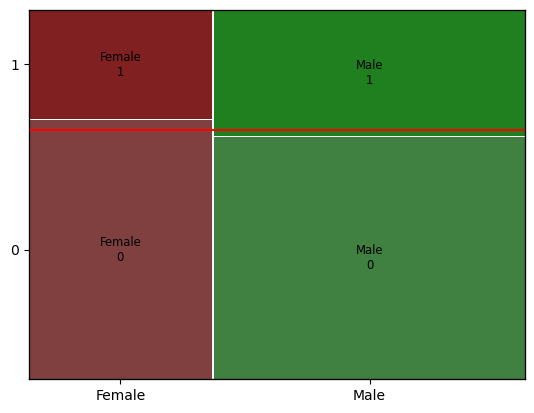

In [31]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [33]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

# 시각적으로 보면 차이가 있는 것 같지만, 수치적으로 보면 차이가 없다.
# 그럼 무조건 차이가 없다고 말할 수 있는가? ==> 그것은 이 관련 비즈니스의 사람과 토론을 통해 결정해야 하는 부분이다.

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

In [34]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

### **(2) JobSatisfaction --> Attrition**

* 교차표

In [47]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
target = 'Attrition'
feature = 'JobSatisfaction'
pd.crosstab(data[target], data[feature], normalize = 'columns')

# 이직률 평균이 0.325이고, 매우 불만족인 1이 0.41로 훨씬 높다 ==> 이 사람들은 대체 왜 이직을 하는지가 중요

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


* 시각화

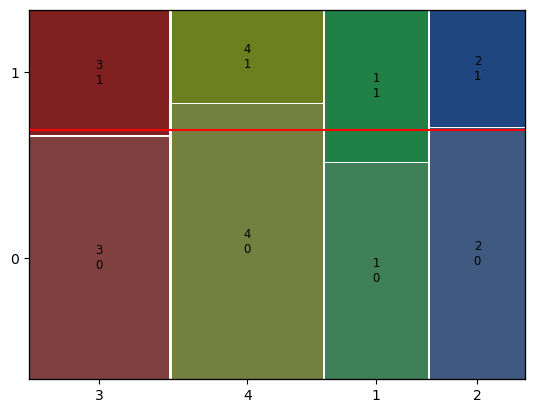

In [37]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [39]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.884191097554549
p-value 0.03087092125625072
자유도 3
기대빈도
 [[ 85.05   78.3   116.775 124.875]
 [ 40.95   37.7    56.225  60.125]]


* 파악된 내용을 기술해 봅시다.

### **(3) MaritalStatus --> Attrition**

* 교차표

In [40]:
target = 'Attrition'
feature = 'MaritalStatus'
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


* 시각화

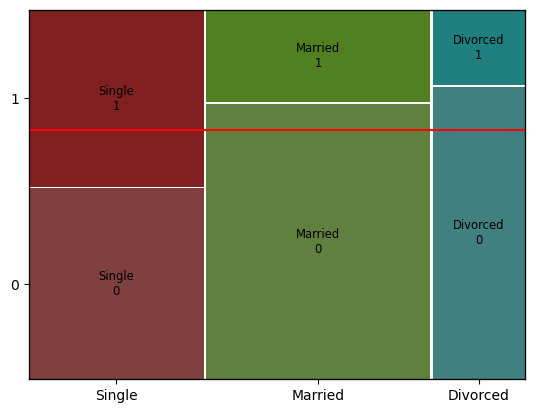

In [41]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [42]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 37.829711907070525
p-value 6.100738829354226e-09
자유도 2
기대빈도
 [[ 75.6  184.95 144.45]
 [ 36.4   89.05  69.55]]


* 파악된 내용을 기술해 봅시다.

### **(4) OverTime --> Attrition**

* 교차표

In [43]:
target = 'Attrition'
feature = 'OverTime'
pd.crosstab(data[target], data[feature])

OverTime,No,Yes
Attrition,,
0,315,90
1,90,105


* 시각화

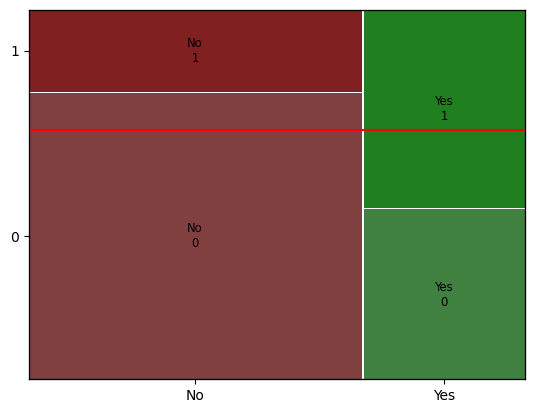

In [44]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [45]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          315   90
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 58.57149427899665
p-value 1.9603625783060702e-14
자유도 1
기대빈도
 [[273.375 131.625]
 [131.625  63.375]]


* 파악된 내용을 기술해 봅시다.

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [82]:
feature = 'Age'

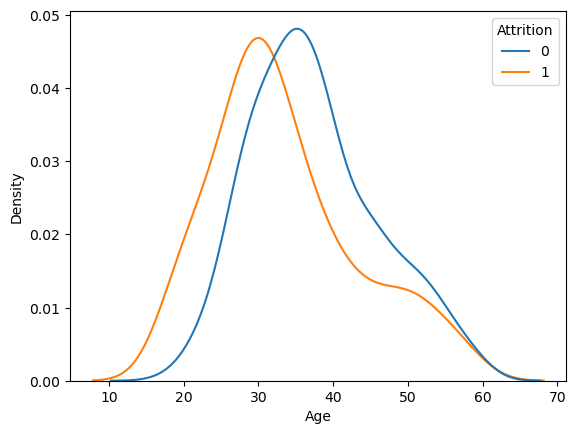

In [83]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

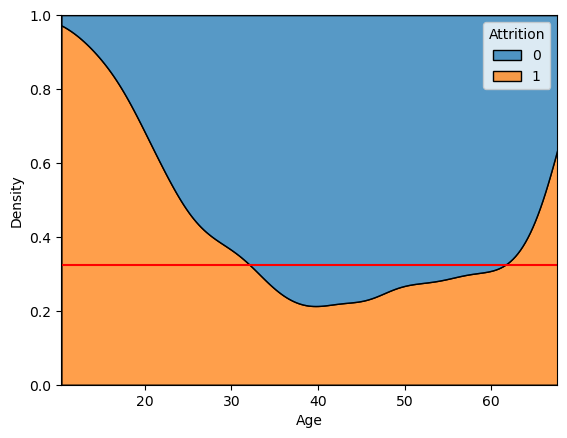

In [50]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

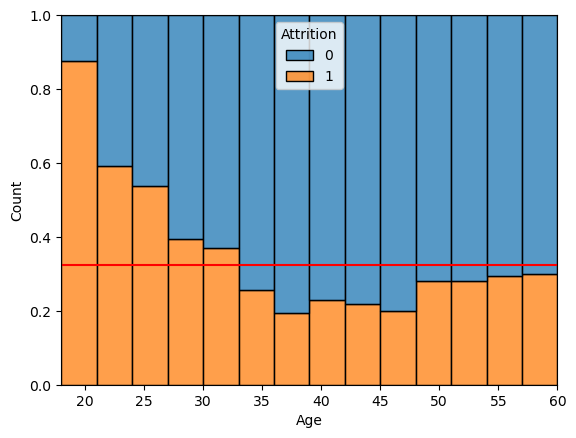

In [51]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

### **(2) DistanceFromHome --> Attrition**

In [84]:
def draw_graph(feature, target):
    fig, axes = plt.subplots(1,3, figsize = (30, 10))
    sns.kdeplot(x= feature, data = data, hue = target,
                common_norm = False, ax = axes[0])
    sns.histplot(x= feature, data = data, hue = target
                , multiple = 'fill', ax = axes[1])
    axes[1].axhline(data[target].mean(), color = 'r')
    sns.kdeplot(x= feature, data = data, hue = target
                , multiple = 'fill', ax = axes[2])
    axes[2].axhline(data[target].mean(), color = 'r')

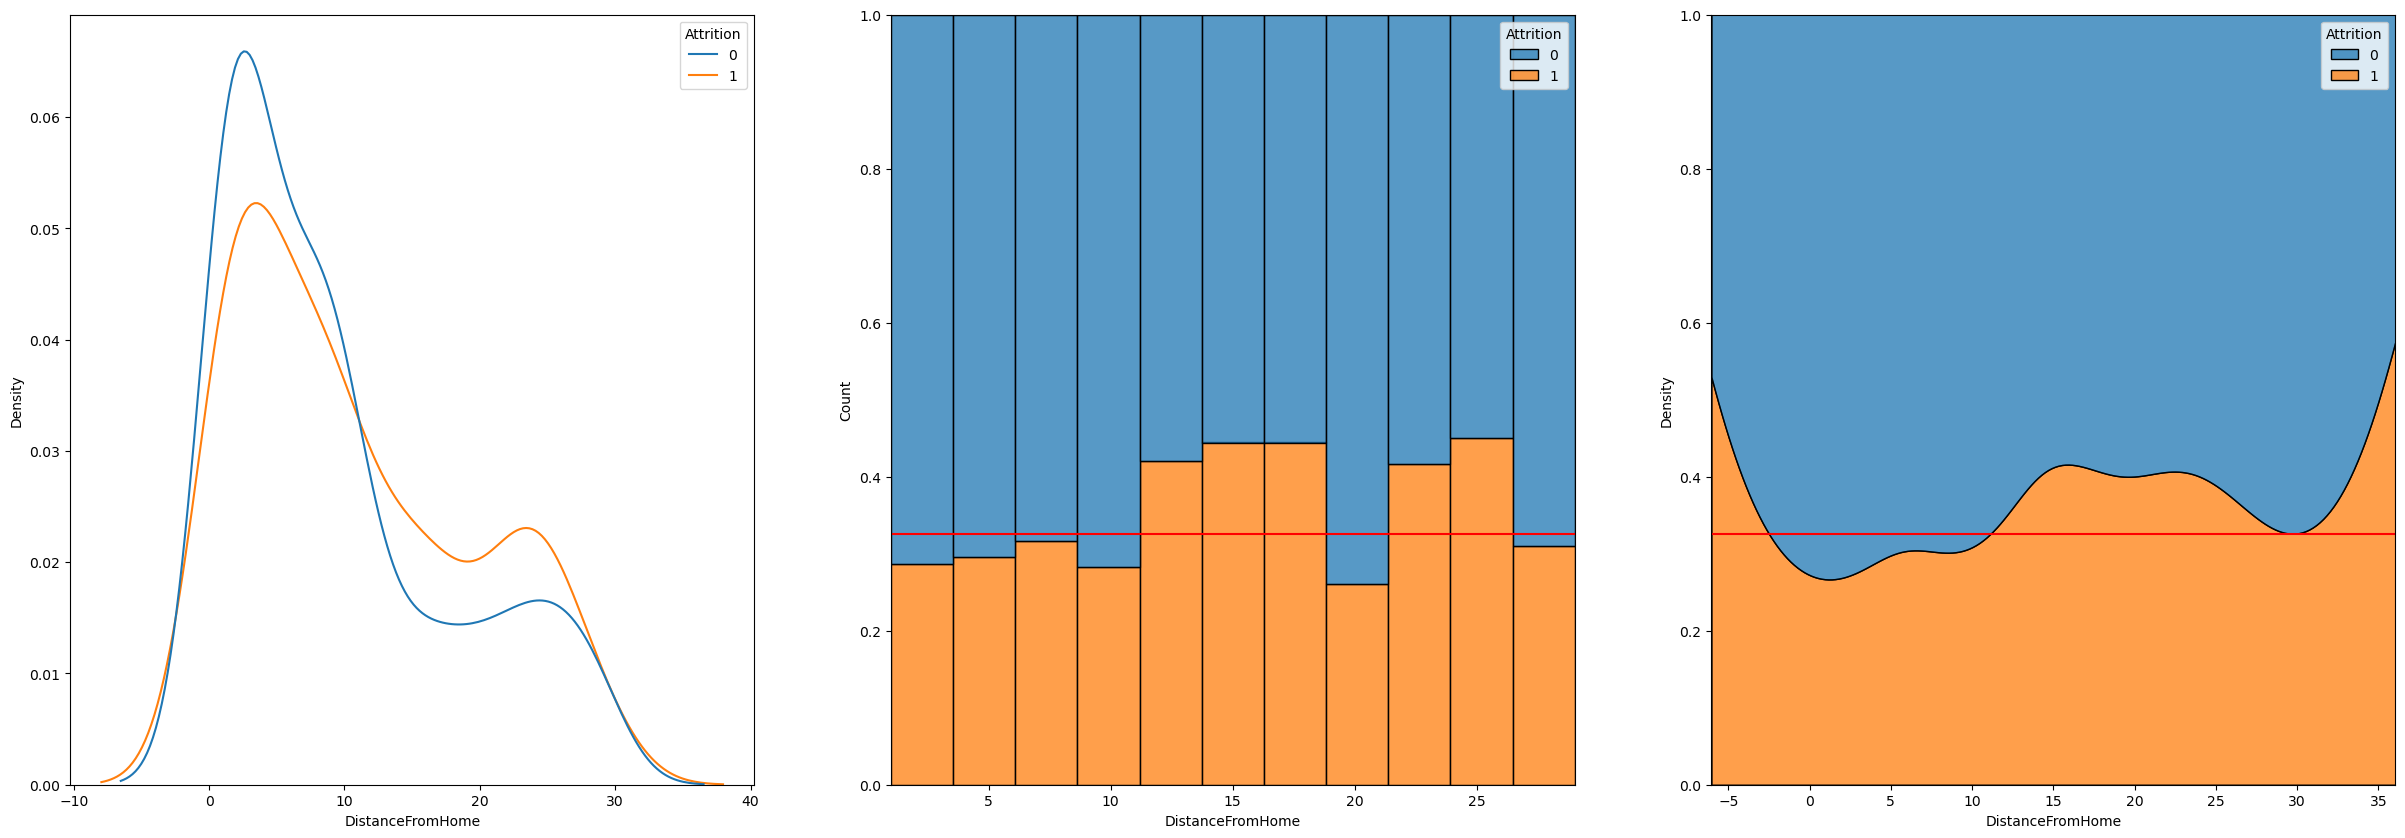

In [85]:
draw_graph('DistanceFromHome', 'Attrition')

* 파악된 내용을 기술해 봅시다.

### **(3) MonthlyIncome --> Attrition**

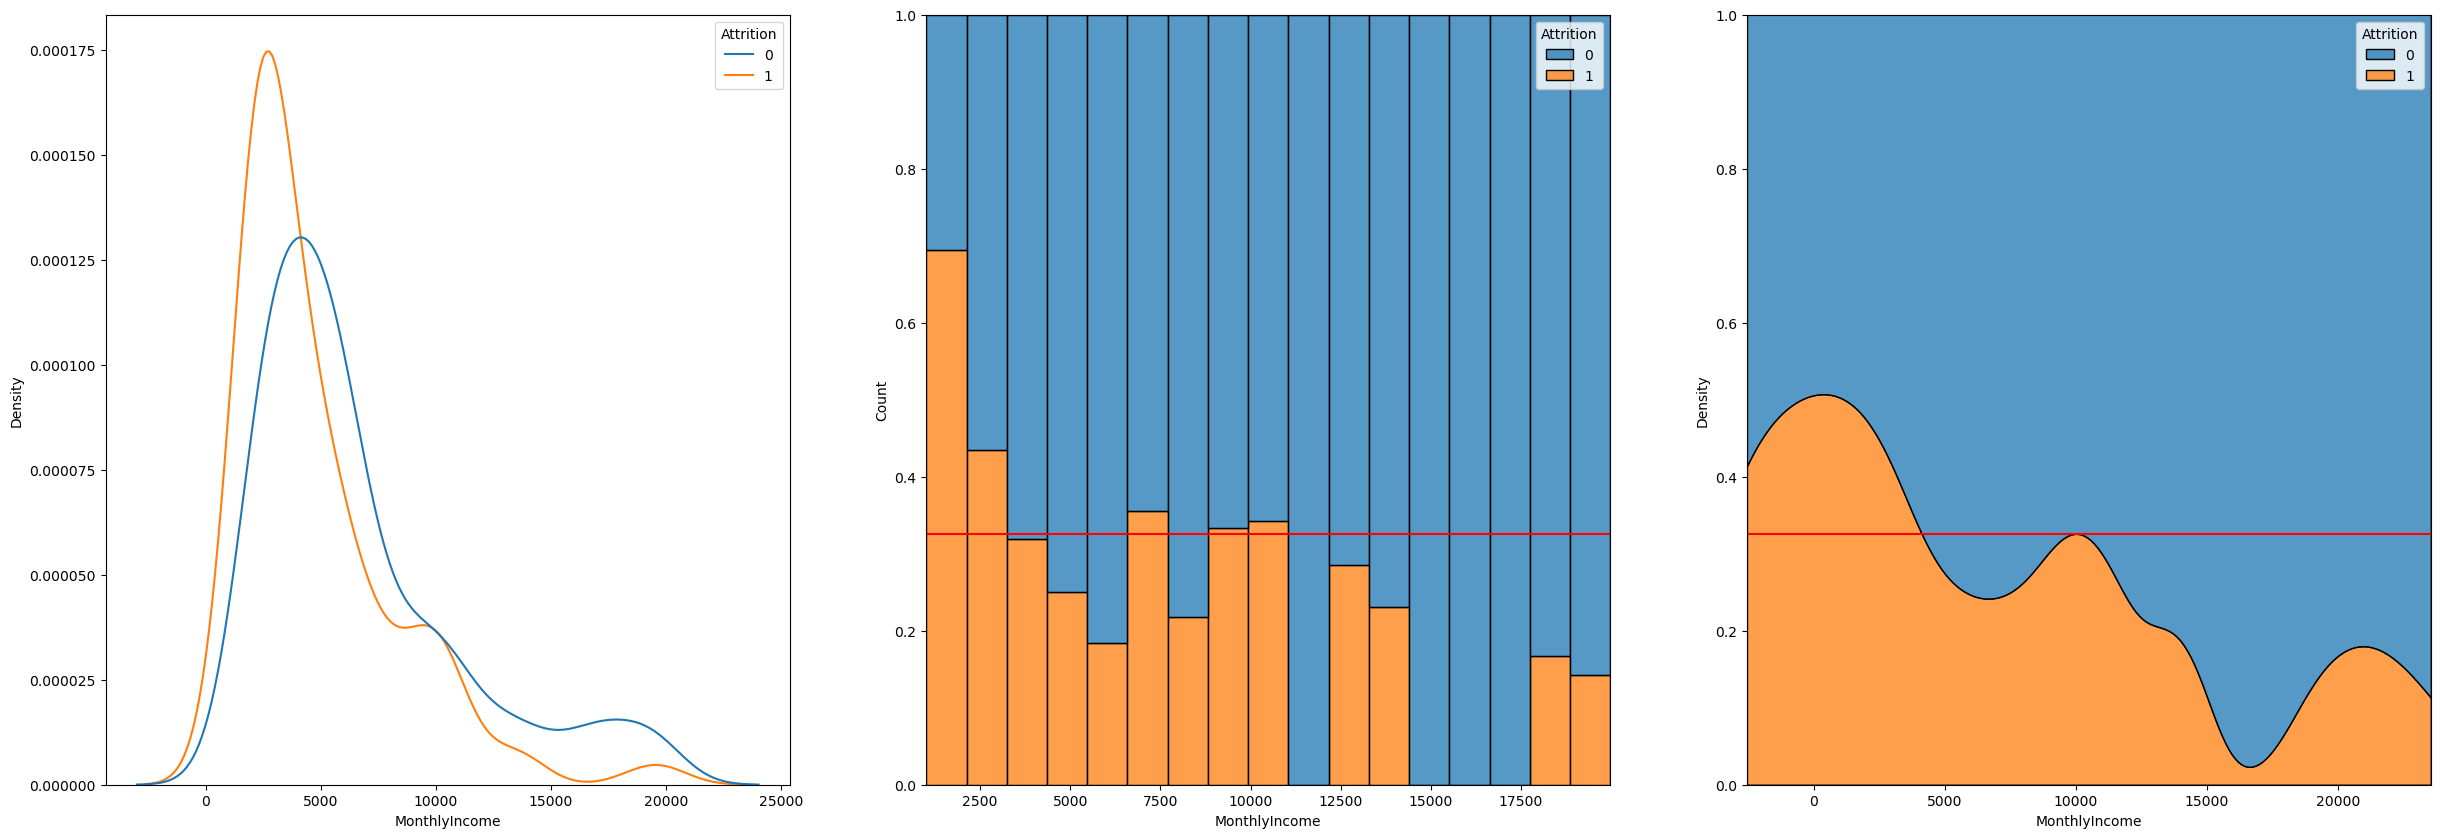

In [86]:
draw_graph('MonthlyIncome', 'Attrition')

* 파악된 내용을 기술해 봅시다.

### **(4) PercentSalaryHike --> Attrition**

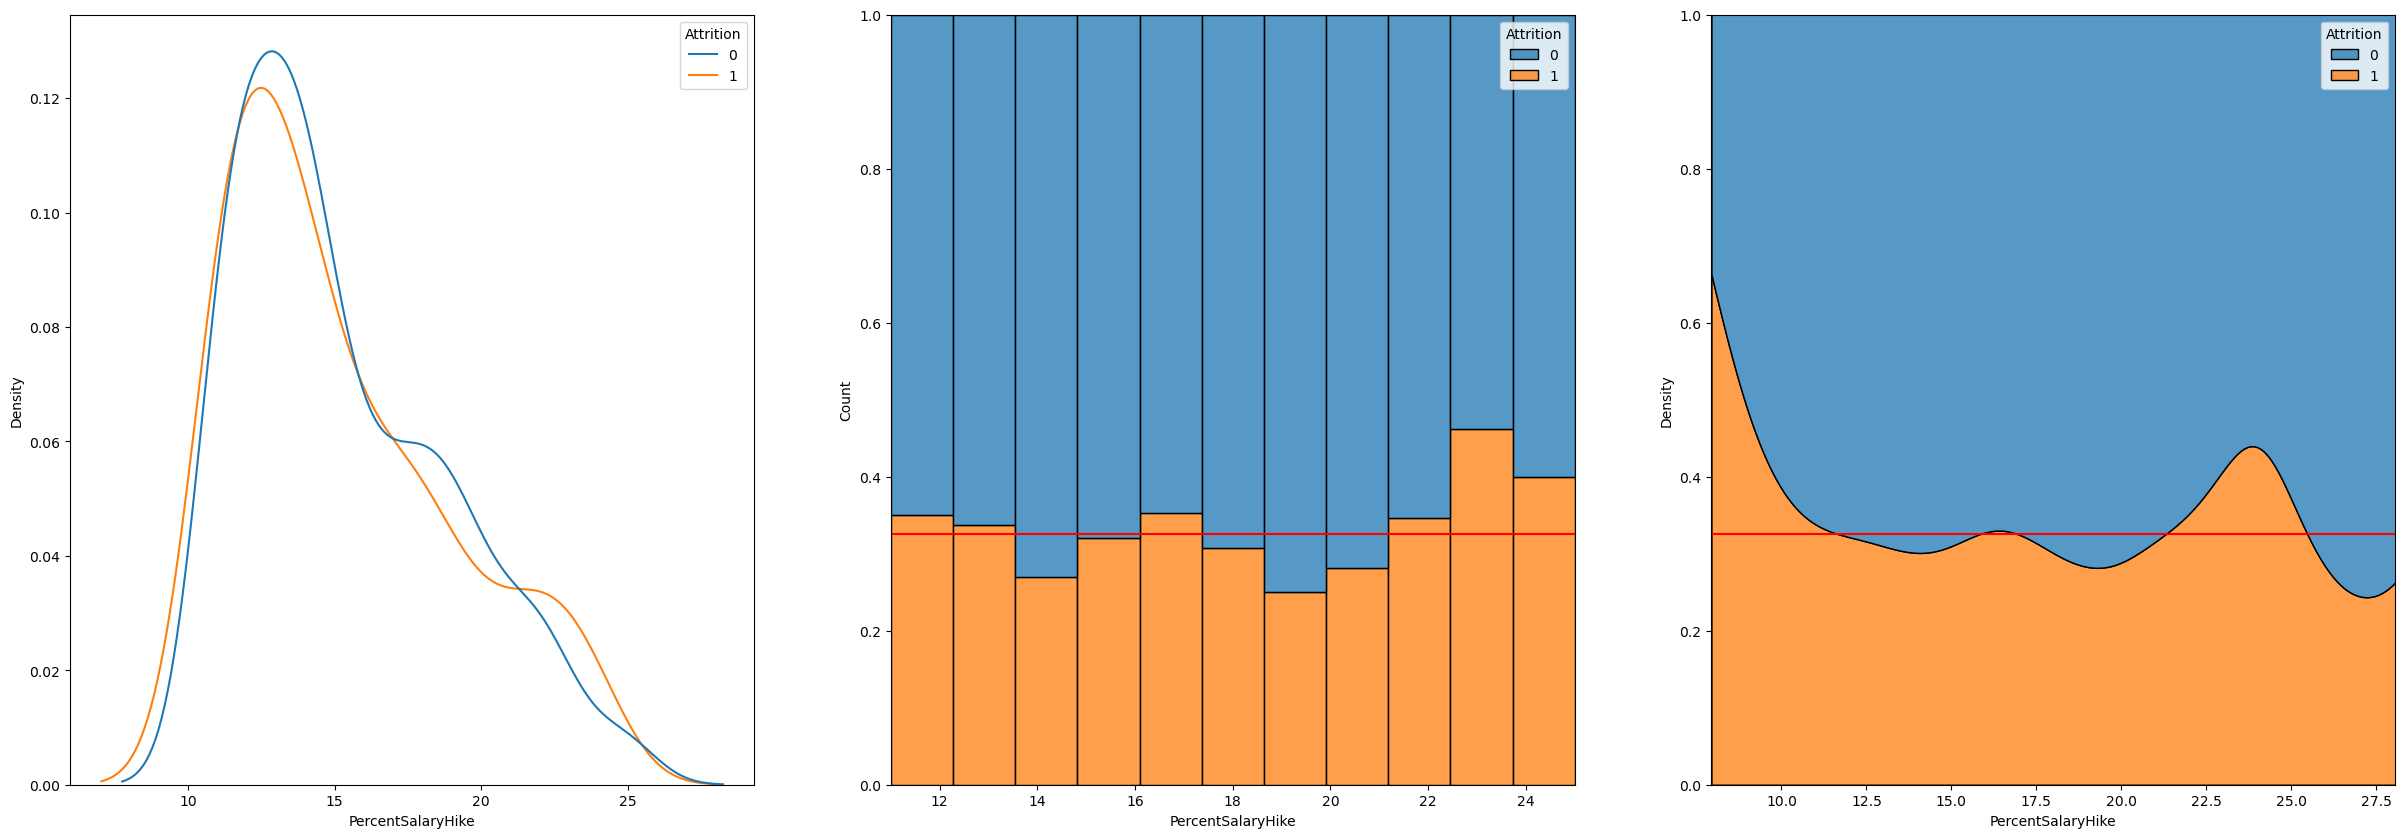

In [87]:
draw_graph('PercentSalaryHike', 'Attrition')

* 파악된 내용을 기술해 봅시다.

### **(5) TotalWorkingYears --> Attrition**

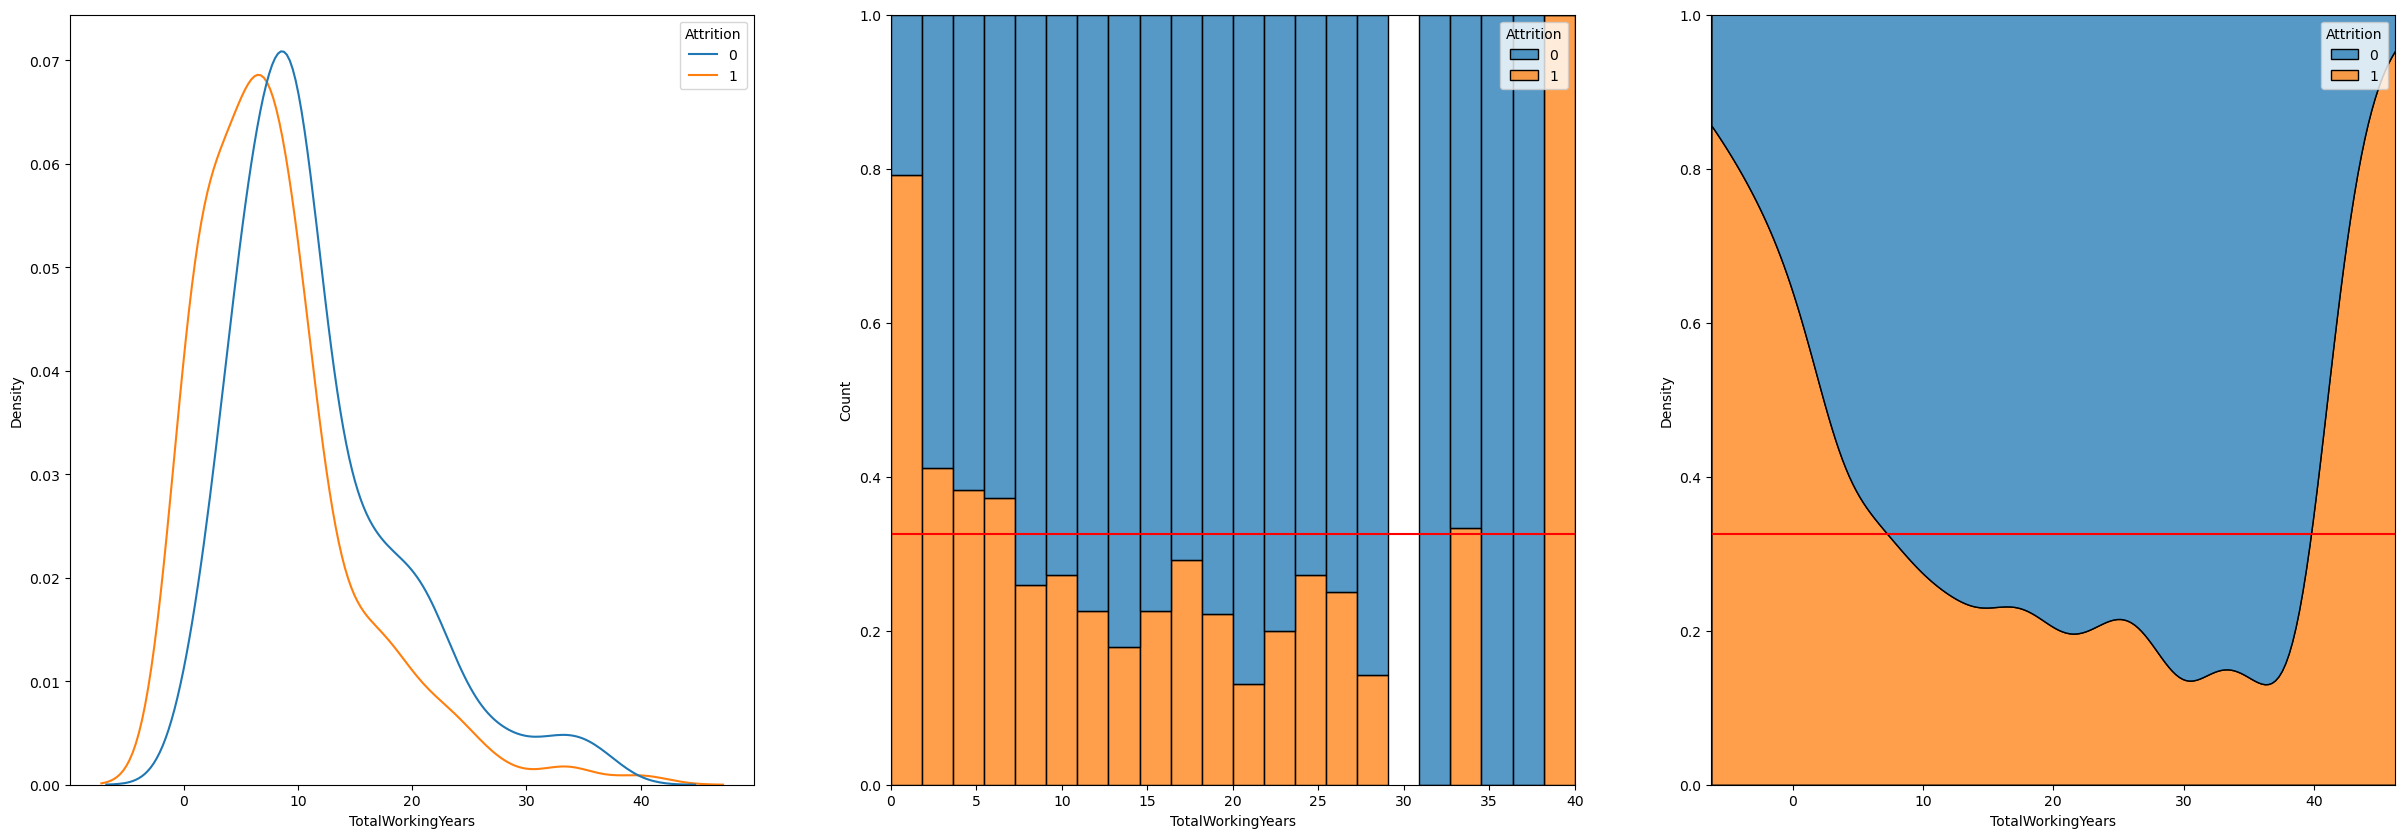

In [88]:
draw_graph('TotalWorkingYears', 'Attrition')

* 파악된 내용을 기술해 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음(약한 관계)